In [83]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

Train: X=(60000, 28, 28), Y=(60000,)
Test: X=(10000, 28, 28), Y=(10000,)


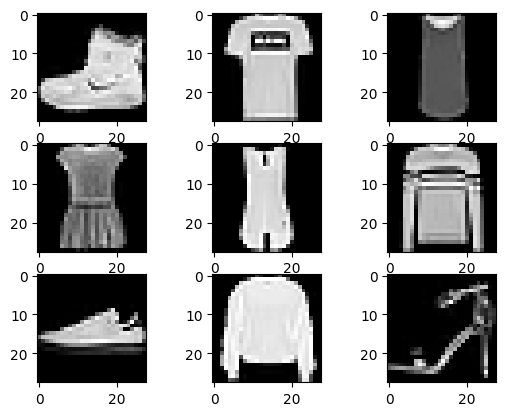

In [84]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist

#summarize loaded dataset
print(f"Train: X={x_train.shape}, Y={y_train.shape}")
print(f"Test: X={x_test.shape}, Y={y_test.shape}")


# plot 1st few images
for i in range(9):
    pyplot.subplot(330+1+i)
    
    #plot raw pixel data
    
    pyplot.imshow(x_train[i],cmap='gray')
pyplot.show()

In [85]:
#reshape dataset to have a single channel
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [72]:
#convert from intgers to float #Nor . 0 to 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [88]:
#convert to one hot encoder (vector)
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [74]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 5, 5, 64)         

In [79]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

1875/1875 [==============================] - 39s 20ms/step - loss: 0.5732 - accuracy: 0.7859 - val_loss: 0.4101 - val_accuracy: 0.8432


In [80]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 2s 5ms/step - loss: 0.4101 - accuracy: 0.8432
Test accuracy: 0.8432000279426575
Test loss: 0.41010674834251404


In [81]:
# Single value prediction and visualization
index = 26  # Index of the image to predict and visualize
prediction = np.argmax(model.predict(x_test[index:index+1]), axis=-1)
print("Predicted Label:" , prediction[0])
print("Actual Label:" , y_test[index])

1/1 [==============================] - 0s 79ms/step
Predicted Label: 4
Actual Label: 6


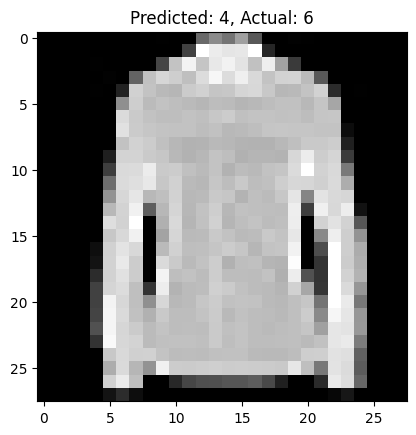

In [82]:
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {prediction[0]}, Actual: {y_test[index]}")
plt.show()
